In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
% matplotlib inline

In [3]:
file_list = glob('all.txt')
type(file_list)

list

In [4]:
t = []
for file in file_list:
    with open(file ,'r', encoding = 'utf-8') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [5]:
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [6]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 1.917 seconds.
Prefix dict has been built succesfully.


,,,!,"""",#,$,%,&,(,),...,﻿,！,％,（,）,＋,，,／,：,；
0,3942,2647,1,2,2,18,10,3,574,574,...,1,2,2,39,39,1,1517,1,270,79


In [7]:
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,吊,吊式,同,同仁,同將,同心,同時,同時爭,同時通,同期,...,﻿,！,％,（,）,＋,，,／,：,；
0,2,2,3,31,1,2,14,1,2,2,...,1,2,2,39,39,1,1517,1,270,79


In [8]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)


,同仁,品,品牌,品質,商品,商機,單位,四,因應,國內,...,顯示器,風險,馬,驗證,高,（,）,，,：,；
0,0.016341,0.012124,0.012651,0.01476,0.01107,0.01845,0.013706,0.021613,0.041644,0.019504,...,0.011597,0.026884,0.080652,0.01476,0.024775,0.020558,0.020558,0.799667,0.142327,0.041644


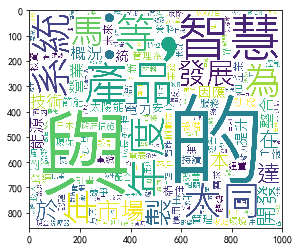

In [30]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

In [34]:
remove_list = ['的','，','；','年','為','或','製','對','提供','提升','無','本','大同','概況','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
for item in remove_list:
    tfidf_dict[0].pop(item, None)

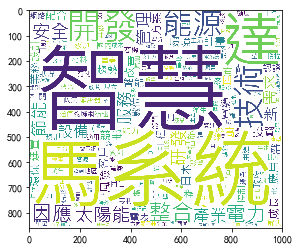

In [35]:
remove_list = ['的','，','；','年','為','或','製','對','提供','提升','無','本','大同','概況','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

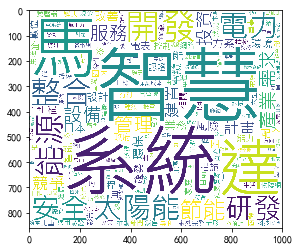

In [44]:
#結果圖呈現
remove_list =['的','，','；','年','為','或','製','對','提供','提升','無','本','大同','概況','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
remove_list = remove_list +['：','長','發展','技術','客戶','高','新','因應','1','年報','應用','成長','精進','管理系','重要','提升','支持','聚焦','產','群','統','造','進行','本業','產品','投入','因此','活化','而','策略']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()